<h1><center> Analyze A/B Test Results </center></h1>


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusions](#Conclusions)

<a id='intro'></a>
### Introduction

>A/B tests are very commonly performed by data analysts and data scientists. It is important that you get some practice working with the difficulties of these.For this project, you will be working to understand the results of an A/B test run by an e-commerce website. Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

%matplotlib inline

#setting the seed to assure getting the same results everytime
random.seed(42)

#just to make my work elegent
import warnings
warnings.filterwarnings("ignore")

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

There are **two ways** to get that

In [5]:
# Regardless of the repeated user_ids
df.converted.sum()/df.shape[0]

0.11965919355605512

In [6]:
# Considering unique ids only
#first let's build a dataset of converted = 1 then extract the number of unique users and divide it by the total number
df.query("converted == 1").user_id.nunique()/df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
df.query("(group == 'control' and landing_page == 'new_page') or (group == 'treatment' and landing_page == 'old_page')").shape[0]

3893

f. Do any of the rows have missing values?

Also here there are **two methods** to get that.

In [9]:
#By info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [10]:
#By isnul()
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

> **Ans:** No

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  
>**Ans:** Let's just drop them.

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [14]:
df2 = df.query("(group == 'control' and landing_page == 'old_page') or (group == 'treatment' and landing_page == 'new_page')")

In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
df2.user_id[df2.user_id.duplicated()]

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [18]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
df2.drop(index=2893,inplace=True)

In [20]:
#just to make sure everything is okay
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


>**Perfect ! ☺**

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
df2.query("group == 'control'").converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
df2.query("group == 'treatment'").converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [24]:
df2.query("landing_page == 'new_page'").shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Before jumping to conclusions:** 
I wanna know the time taken to conduct this experiment

In [25]:
[sorted(df2['timestamp'],key=lambda x:int(x[8:10]))[i] for i in [0,-1]]

['2017-01-02 21:33:49.325594', '2017-01-24 05:11:06.445402']

**Ans:** 
> The results from a. through d. above suggests that the new treatment page doesn't lead to more conversions and there is no sufficient evidence for saying otherwise .Because there is **Sufficient traffic** (new_page:145310,old_page:145274) which makes the probability that an individual received the new page is approximately 0.5 **(Consistency among test subjects in the control and treatment group)**,i think if there is any mistakes it maybe because of **The novelty effect and change aversion** or just the time taken to conduct this experiment isn't long enough(only 22 days)

<a id='ab_test'></a>
### Part II - A/B Test

>Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed. However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} <= 0$$


$$H_1: p_{new} - p_{old} >  0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [26]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [27]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [28]:
n_new = df2.query("landing_page == 'new_page'").shape[0]
n_new

145310

d. What is $n_{old}$?

In [29]:
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

- **I think the best simulation here is by binomial distribution as the outcomes is only 0 or 1**

In [30]:
new_page_converted = np.random.binomial(n=1,p=p_new,size=n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
old_page_converted = np.random.binomial(n=1,p=p_old,size=n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
new_page_converted.mean() - old_page_converted.mean()

0.0017944282235101

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [33]:
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

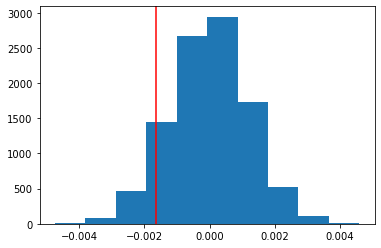

In [38]:
# Let's calculate the actual diffrence 
actual_diff = df.query("landing_page == 'new_page'").converted.mean()-df.query("landing_page == 'old_page'").converted.mean()
# Let's plot the distribution 
plt.hist(p_diffs)
plt.axvline(x=actual_diff,color='red');

> According to the **central limit theorem : "with large enough sample sizes our sample mean will follow a normal distribution"**.So that's exactly what i expected

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [39]:
(p_diffs > actual_diff).mean()  #p-value

0.9072

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

##### Explanation :
- **What is this value called in scientific studies?** <br><br> 
> This value is called,in scientific studies,the **p-value**
 
- **What does this value mean in terms of whether or not there is a difference between the new and old pages?** <br><br>
> It tells us the probabilty of obtaining results as extreme as the observed results of a statistical hypothesis test,**assuming that the null hypothesis is true**.The threshold here is the type 1 error rate (0.05).So we can conclude that we failed to reject the null hypothesis which means we think that the new page isn't better than the old one.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [40]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

convert_old = df2.query("landing_page == 'old_page'").converted.sum()
convert_new = df2.query("landing_page == 'new_page'").converted.sum()
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

In [41]:
count = np.array([convert_old, convert_new])
nobs = np.array([n_old, n_new])
zstat, pval = proportions_ztest(count, nobs,alternative='smaller')
print('the z-score is:',zstat)
print('the p-value is:',pval)

the z-score is: 1.3109241984234394
the p-value is: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>Z score is between -1.96 and +1.96 which means a confidence interval whithin 95% and p-value of more than 0.05. all that means that **we can not reject the null hypothesis**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> **Logistic Regression** .As there are only two available outcomes

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [42]:
df2['intercept'] = 1
df2[['control','ab_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [43]:
log_model = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 19 Sep 2020   Pseudo R-squ.:               8.077e-06
Time:                        19:03:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

- **What is the p-value associated with ab_page?**
> **Ans** : 0.19
- **Why does it differ from the value i found in Part II?**
> **Ans** : it differs from the value calculated in part II as here it's **two tailed test instead of one tailed test like in part II**:
$$H_0: \beta_{1} = 0$$
$$H_1: \beta_{1} \neq 0$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- **Discussion of why it is a good idea to consider other factors to add into my regression model.Are there any disadvantages to adding additional terms into my regression model?**
> I think that "group" isn't a good feature to this model and there aren't any other feature available in the dataset now that can benefit my model so it's better to find some other factors that can improve the performance of the model.**But** we should pay attention to that factor that we will add and make sure that it doesn't depend on any other existing feature .

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [46]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [47]:
df_new = df_new.join(pd.get_dummies(df_new['country']))
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [48]:
log_model = sm.Logit(df_new['converted'],df_new[['intercept','CA','US']])
results = log_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 19 Sep 2020   Pseudo R-squ.:               1.521e-05
Time:                        19:06:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

- **Does it appear that country had an impact on conversion?**
> the p-value in the previous summary (CA:0.074,US:0.456) indicates that the "country" factor doesn't have a sensible impact on conversion (because it's higher than 0.05)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [49]:
df_new['ab_CA'] = df_new['ab_page']*df_new['CA']
df_new['ab_US'] = df_new['ab_page']*df_new['US']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US,ab_CA,ab_US
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,0


In [50]:
log_model = sm.Logit(df_new['converted'],df_new[['intercept','ab_CA','ab_US']])
results = log_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 19 Sep 2020   Pseudo R-squ.:               3.272e-05
Time:                        19:08:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.03077
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9873      0.007   -275.573      0.000      -2.001      -1.973
ab_CA         -0.0842      0.038     -2.225      0.026      -0.158      -0.010
ab_US         -0.0197      0.012     -1.634      0.102      -0.043       0.004
==============================================================================
"""

> It's seems that we finally have a feature that is statistically significant.**But** is it practically significant ? ... Let's see

In [51]:
1/np.exp(-0.0842)

1.087846441341616

>That tells us that an individual from CA is 1.088 times less likely to convert than the one from UK.In my opinion,**this isn't practically significant**

**Before Wrapping up this analysis**

>Let's see if this bad result of the new page is because of the insufficiency of the period of time for conducting this experiment.Let's divide this period (22 days) into **four periods(6,6,5,5)**

In [52]:
def get_period(day):
    if day <= 6:
        return 1
    elif (day > 6) and (day <= 12):
        return 2
    elif (day > 12) and (day <= 17):
        return 3
    else:
        return 4

In [53]:
df_time = df2.copy()
df_time['period'] = df_time['timestamp'].apply(lambda x: get_period(int(x[8:10])))
df_time.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,period
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,4
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,2
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,2
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,2
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,4


In [54]:
df_time[['period1','period2','period3','period4']] = pd.get_dummies(df_time['period'])

In [55]:
df_time.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,period,period1,period2,period3,period4
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,4,0,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,2,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,2,0,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,2,0,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,4,0,0,0,1


In [56]:
log_model = sm.Logit(df_time['converted'],df_time[['intercept','period1','period2','period3']])
results = log_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366119
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 19 Sep 2020   Pseudo R-squ.:               6.968e-06
Time:                        19:09:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.6863
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9887      0.010   -190.651      0.000      -2.009      -1.968
period1       -0.0193      0.017     -1.166      0.243      -0.052       0.013
period2       -0.0100      0.015     -0.665      0.506      -0.040       0.020
period3       -0.0044      0.016     -0.277      0.782      -0.036       0.027
==============================================================================
"""

>**Also time is not a good factor :(**

<a id='conclusions'></a>
## Conclusions



>**To sum up,**,After carrying out this analysis we can see that the new page isn't better than the old one and we can't say that this badness is because that the time is not long enough ( as we saw from the last logistic model there is no improvement with increasing in time).Maybe it's **The Novelty effect and change aversion** or other reason that i am not aware of.But all i know now is that **it's better for this e-commerce website to keep the old page**.